In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import re
import nltk
import math
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from imblearn.over_sampling import SMOTE

%matplotlib inline

In [2]:
df = pd.read_csv('proteins_5cl-PDB-Biopython.csv')
df.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,...,sequence,MW,grav,instability,isoelectric,aromaticity,helix,turn,sheet,type
0,1BCC,OXIDOREDUCTASE,X-RAY DIFFRACTION,Protein,2048,3.16,467225.78,NaN,NaN,3.83,...,GRQFGHLTRVRHLITYSLSPFEQRPFPHYFSKGVPNVWRRLRACIL...,9698.1064,-0.503704,69.887778,10.710144,0.172840,0.358025,0.222222,0.197531,2
1,4DF9,HYDROLASE,X-RAY DIFFRACTION,Protein,2454,2.17,285852.50,"VAPOR DIFFUSION, SITTING DROP",293.0,2.82,...,GAQNFSDYFTNKTLRIDYLFTGNADKQSICLDELSELPVWAGRRHH...,46094.4424,-0.360880,41.154377,5.803650,0.119804,0.308068,0.227384,0.234719,0
2,5D10,TRANSFERASE,X-RAY DIFFRACTION,Protein,572,2.70,66414.59,"VAPOR DIFFUSION, HANGING DROP",293.0,3.05,...,GHMQTQGLAKDAWEIPRESLRLEVKLGQGCFGEVWMGTWNGTTRVA...,32735.4908,-0.310490,40.837063,5.585022,0.101399,0.307692,0.188811,0.314685,4
3,5C7E,TRANSCRIPTION,X-RAY DIFFRACTION,Protein,1320,3.10,156775.77,"VAPOR DIFFUSION, SITTING DROP",293.0,4.00,...,SETELDLALGL,1160.2715,0.418182,44.109091,3.574280,0.000000,0.363636,0.181818,0.636364,3
4,4V45,HYDROLASE,X-RAY DIFFRACTION,Protein,16368,2.60,1871622.00,"VAPOR DIFFUSION, HANGING DROP",295.0,3.10,...,TMITDSLAVVLQRRDWENPGVTQLNRLAAHPPFASWRNSEEARTDR...,116350.2846,-0.434702,43.327370,5.276550,0.105572,0.300098,0.234604,0.252199,0


In [3]:
df.classification.value_counts()

HYDROLASE         46336
TRANSFERASE       36424
OXIDOREDUCTASE    34322
IMMUNE SYSTEM     15615
TRANSCRIPTION      8919
Name: classification, dtype: int64

In [4]:
df.classification.value_counts()

HYDROLASE         46336
TRANSFERASE       36424
OXIDOREDUCTASE    34322
IMMUNE SYSTEM     15615
TRANSCRIPTION      8919
Name: classification, dtype: int64

In [5]:
df.type.value_counts()

0    46336
4    36424
2    34322
1    15615
3     8919
Name: type, dtype: int64

In [6]:
df.dtypes

structureId                  object
classification               object
experimentalTechnique        object
macromoleculeType            object
residueCount                  int64
resolution                  float64
structureMolecularWeight    float64
crystallizationMethod        object
crystallizationTempK        float64
densityMatthews             float64
densityPercentSol           float64
pdbxDetails                  object
phValue                     float64
publicationYear             float64
chainId                      object
sequence                     object
MW                          float64
grav                        float64
instability                 float64
isoelectric                 float64
aromaticity                 float64
helix                       float64
turn                        float64
sheet                       float64
type                          int64
dtype: object

## Classification of Proteins

##  Split the data into training & test sets.

In [7]:
predictors = ['MW', 'grav', 'instability', 'isoelectric','aromaticity', 'helix','turn','sheet']
X = df[predictors]
y = df.type

In [8]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(113292, 8) (113292,)
(28324, 8) (28324,)


In [9]:
y_test.value_counts()

0    9230
4    7271
2    6929
1    3135
3    1759
Name: type, dtype: int64

## Logistic Regression Model

In [10]:
# Logistic Regression 
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
print("Logistic Regression Score: {:.2f}".format(lr.score(X_test, y_test)))

/Users/scottlew/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/scottlew/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression Score: 0.33


In [11]:
# Generate Confusion Matrix for Logistic Regression
actual = y_test
predictions = lr.predict(X_test)
print('Confusion Matrix for Logistic Regression Model')
print()
cm = confusion_matrix(actual,predictions)
print(cm)

Confusion Matrix for Logistic Regression Model

[[8739  476    7    0    8]
 [2661  472    1    0    1]
 [6597  332    0    0    0]
 [1289  467    3    0    0]
 [6935  316   20    0    0]]


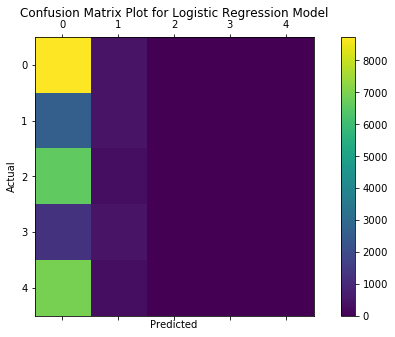

In [12]:
# Nice plot of confusion matrix
# Adjust size of confusion matrix by following code taken from StackOverflow
# https://stackoverflow.com/questions/43021762/matplotlib-how-to-change-figsize-for-matshow
plt.figure(figsize=(10,5))
plt.matshow(cm, fignum=1)

plt.title('Confusion Matrix Plot for Logistic Regression Model')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

## Decision Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
#dtc = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
dtc = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
predictions = dtc.predict(X_test)
print("Decision Tree Classifier Score: {:.2f}".format(dtc.score(X_test, y_test)))

Decision Tree Classifier Score: 0.95


In [14]:
# Generate Confusion Matrix for Decision Tree Classifier
actual = y_test
predictions = dtc.predict(X_test)
print('Confusion Matrix for Decision Tree Model')
print()
cm = confusion_matrix(actual,predictions)
print(cm)

Confusion Matrix for Decision Tree Model

[[8777   81   97   76  199]
 [ 106 2939   31   25   34]
 [ 114   17 6694   31   73]
 [  67   37   30 1552   73]
 [ 174   34   96   91 6876]]


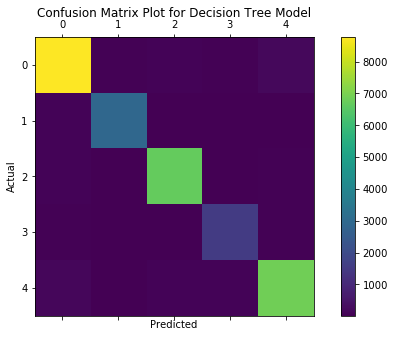

In [15]:
# plot of confusion matrix
plt.figure(figsize=(10,5))
plt.matshow(cm, fignum=1)

plt.title('Confusion Matrix Plot for Decision Tree Model')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()